# Aula 1 - Análise de Dados com Pandas


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Renomeando as colunas do DataFrame

In [ ]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


### Analisando quais sãos as categorias das colunas categóricas

#### Nível de senioridade

In [ ]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


| Sigla | Significado | Descrição                                 |
|-------|-------------|--------------------------------------------|
| SE    | Senior      | Profissional experiente (nível sênior)     |
| MI    | Mid         | Nível intermediário                        |
| EN    | Entry       | Iniciante ou júnior (entry-level)          |
| EX    | Executive   | Executivo, liderança sênior (C-Level)      |


#### Tipo de contrato

In [ ]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| FT    | Full-time    | Tempo integral – trabalho padrão de 40h/semana ou período completo   |
| PT    | Part-time    | Meio período – carga horária reduzida                                |
| CT    | Contract     | Contrato temporário ou por projeto – geralmente por prazo determinado|
| FL    | Freelance    | Freelancer – trabalho autônomo ou por demanda, sem vínculo formal    |


#### Regime de trabalho

In [ ]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


O modelo remoto permite trabalhar de qualquer lugar sem precisar ir à empresa. O modelo presencial exige ir até o escritório todos os dias. O híbrido mistura os dois modelos. O modelo 'everywhere' é mais raro e permite trabalhar de qualquer lugar do mundo sem restrição de país ou cidade.

| Sigla | Significado |
|-------|-------------|
| 0     | Presencial  |
| 100   | Remoto      |
| 50    | Híbrido     |

#### Tamanho da empresa

In [ ]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| M   | Medium    | Empresa de tamanho médio|
| L    | Large    | Empresa de tamanho grande                                |
| S    | Small    | Empresa de tamanho pequeno|


### Modificando o nome das categorias:

In [ ]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [ ]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [ ]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [ ]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Podemos também resumir as informações categóricas com o método `describe()`, exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [ ]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


Com isso já conseguimos responder algumas perguntas, como:

* Qual o nível de experiência mais comum na base de dados?
* Qual é o tipo de contrato mais frequente?
* Qual o cargo mais frequente na amostra?
* De qual país são a maioria dos profissionais da base?
* Qual é o país onde mais empresas da amostra estão sediadas?
* Qual o regime de trabalho mais comum?
* Qual é o tamanho mais comum das empresas na amostra?

**O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.**

# Aula 2 - Preparação e limpeza dos Dados

O código a seguir verifica a existência de valores nulos (ausentes) em cada célula do DataFrame df. O resultado é um DataFrame booleano de mesma forma que o original, onde True indica a presença de um valor nulo e False indica a ausência.

In [ ]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


Este comando exibe as primeiras 5 linhas do DataFrame df após as operações de limpeza e preparação realizadas anteriormente. É útil para verificar o estado atual do DataFrame.

In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Este código calcula a quantidade de valores nulos em cada coluna do DataFrame df. O resultado é uma série, onde o índice é o nome da coluna e o valor é a contagem de nulos naquela coluna. Isso nos mostra quais colunas têm dados faltando e em qual quantidade.

In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


Este código retorna todos os valores únicos presentes na coluna 'ano' do DataFrame df. Isso é útil para entender a distribuição dos anos na base de dados e identificar possíveis inconsistências ou a presença de valores nulos (nan).

In [ ]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Este código filtra o DataFrame df para exibir apenas as linhas que contêm pelo menos um valor nulo em qualquer coluna. O isnull() retorna um DataFrame booleano, any(axis=1) verifica se há algum True em cada linha (axis=1), e o resultado é usado para indexar o DataFrame original. Isso ajuda a inspecionar as linhas que precisam de tratamento de valores ausentes.

In [ ]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


Este código cria um DataFrame de exemplo chamado df_salarios com uma coluna 'nome' e uma coluna 'salario' contendo alguns valores nulos (np.nan). Em seguida, demonstra duas formas de preencher os valores nulos da coluna 'salario':

1. fillna(df_salarios['salario'].mean().round(2)): Preenche os valores nulos com a média da coluna 'salario', arredondada para duas casas decimais.

2. fillna(df_salarios['salario'].median()): Preenche os valores nulos com a mediana da coluna 'salario'. O resultado mostra o DataFrame original e as duas novas colunas com os valores nulos preenchidos.

In [ ]:
import numpy as np

# Criação de um dataframe de teste para usar de exemplo
df_salarios = pd.DataFrame({
    'nome':["Eloise", "Enoque", "Carlos", "Victor","Edvaldo"],
    'salario':[4000, np.nan, 5000, np.nan, 100000]
})

# calcula a média salarial e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Calcula a mediana e substitui os nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Eloise,4000.0,4000.00,4000.0
1,Enoque,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Victor,NaN,36333.33,5000.0
4,Edvaldo,100000.0,100000.00,100000.0


Este código cria um DataFrame de exemplo chamado df_temperaturas com uma coluna 'Dia' e uma coluna 'Temperatura' contendo alguns valores nulos. Em seguida, demonstra o uso do método ffill() (forward fill) para preencher os valores nulos. O ffill() preenche os valores nulos com o último valor válido anterior na mesma coluna. O resultado mostra o DataFrame original e a nova coluna com os valores nulos preenchidos usando o método ffill.

In [ ]:
df_temperaturas = pd.DataFrame({
    'Dia':['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'],
    'Temperatura':[30, np.nan, np.nan, 28, 27, 32, 36]
})

df_temperaturas['Preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()

df_temperaturas

,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0
5,Sábado,32.0,32.0
6,Domingo,36.0,36.0


Este código cria um DataFrame de exemplo chamado df_temperaturas com uma coluna 'Dia' e uma coluna 'Temperatura' contendo alguns valores nulos. Em seguida, demonstra o uso do método bfill() (backward fill) para preencher os valores nulos. O bfill() preenche os valores nulos com o próximo valor válido posterior na mesma coluna. O resultado mostra o DataFrame original e a nova coluna com os valores nulos preenchidos usando o método bfill.

In [ ]:
df_temperaturas = pd.DataFrame({
    'Dia':['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'],
    'Temperatura':[30, np.nan, np.nan, 28, 27, 32, 36]
})

df_temperaturas['Preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()

df_temperaturas

,Dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0
5,Sábado,32.0,32.0
6,Domingo,36.0,36.0


Este código cria um DataFrame de exemplo chamado df_cidades com uma coluna 'nome' e uma coluna 'Cidade' contendo alguns valores nulos. Em seguida, demonstra o uso do método fillna() para preencher os valores nulos com uma string específica: 'Não informado'. O resultado mostra o DataFrame original e a nova coluna com os valores nulos preenchidos com a string.

In [ ]:
df_cidades = pd.DataFrame({
    'nome':["Eloise", "Enoque", "Carlos", "Victor","Edvaldo"],
    'Cidade':['São Paulo', np.nan, 'Belém', np.nan, 'Rio Grande do Norte']

})

df_cidades['Cidade_preenchida'] = df_cidades['Cidade'].fillna('Não informado')
df_cidades

,nome,Cidade,Cidade_preenchida
0,Eloise,São Paulo,São Paulo
1,Enoque,NaN,Não informado
2,Carlos,Belém,Belém
3,Victor,NaN,Não informado
4,Edvaldo,Rio Grande do Norte,Rio Grande do Norte


Este código cria um novo DataFrame chamado df_limpo removendo todas as linhas do DataFrame original df que contêm pelo menos um valor nulo. O método dropna() é utilizado para realizar essa operação. O resultado é um DataFrame sem valores ausentes.

In [ ]:
df_limpo = df.dropna()

Este código verifica a quantidade de valores nulos em cada coluna do novo DataFrame df_limpo. Após a aplicação do método dropna(), a contagem de valores nulos em todas as colunas deve ser zero, confirmando que as linhas com valores ausentes foram removidas.

In [ ]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


Este comando exibe as primeiras 5 linhas do DataFrame df_limpo. É útil para visualizar o DataFrame após a remoção das linhas com valores nulos.

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Este comando exibe informações sobre o DataFrame df_limpo, incluindo o número de linhas, o número de colunas, o tipo de dado de cada coluna e a quantidade de valores não nulos em cada coluna. Isso confirma que as linhas com valores nulos foram removidas e mostra os tipos de dados das colunas restantes.

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


Este código converte o tipo de dado da coluna 'ano' no DataFrame df_limpo de ponto flutuante (float64) para inteiro de 64 bits (int64). O método assign() é usado para criar uma nova coluna 'ano' com os valores convertidos, substituindo a coluna original.

In [ ]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

Este comando exibe as primeiras 5 linhas do DataFrame df_limpo após a conversão do tipo de dado da coluna 'ano'. É útil para verificar se a conversão foi bem-sucedida e se a coluna 'ano' agora exibe valores inteiros.

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Este comando exibe informações sobre o DataFrame df_limpo após a conversão do tipo de dado da coluna 'ano'. Isso confirma que o tipo de dado da coluna 'ano' agora é int64, como esperado.

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


## Resumo da Aula 2 - Preparação e Limpeza dos Dados

Nesta aula, focamos na preparação e limpeza dos dados para garantir sua qualidade e usabilidade em análises futuras.

1.  **Verificação de Valores Nulos:** Identificamos a presença de valores nulos no DataFrame utilizando `df.isnull()` e `df.isnull().sum()`. Verificamos que a coluna 'ano' possuía 10 valores nulos.
2.  **Identificação dos Anos:** Verificamos os valores únicos na coluna 'ano', confirmando a presença de `nan`.
3.  **Visualização de Linhas com Nulos:** Filtramos e exibimos as linhas que continham valores nulos para inspecionar os dados ausentes.
4.  **Demonstração de Métodos de Preenchimento:** Apresentamos diferentes métodos para tratar valores nulos em DataFrames de exemplo:
    *   Preenchimento com a média ou mediana (`fillna()`).
    *   Preenchimento com o último valor válido anterior (`ffill()`).
    *   Preenchimento com o próximo valor válido posterior (`bfill()`).
    *   Preenchimento com um valor específico ('Não informado').
5.  **Remoção de Linhas com Nulos:** Criamos um novo DataFrame (`df_limpo`) removendo as linhas que continham valores nulos na coluna 'ano' utilizando `df.dropna()`.
6.  **Verificação da Limpeza:** Confirmamos que não há mais valores nulos no `df_limpo` verificando `df_limpo.isnull().sum()`.
7.  **Verificação do DataFrame Limpo:** Visualizamos as primeiras linhas e as informações do `df_limpo` para confirmar a remoção das linhas e os tipos de dados.
8.  **Conversão de Tipo de Dado:** Convertemos o tipo de dado da coluna 'ano' de float para inteiro (`int64`) no `df_limpo` para representar os anos de forma mais adequada.
9.  **Verificação da Conversão:** Visualizamos as primeiras linhas e as informações do `df_limpo` novamente para confirmar a conversão do tipo de dado da coluna 'ano'.

Com essas etapas, os dados foram limpos e preparados, removendo os valores ausentes na coluna 'ano' e ajustando seu tipo de dado para uma análise mais consistente.

# Aula 3 - Visualização de Dados

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


<Axes: title={'center': 'Distribuição de Nível de Senioridade'}, xlabel='senioridade'>

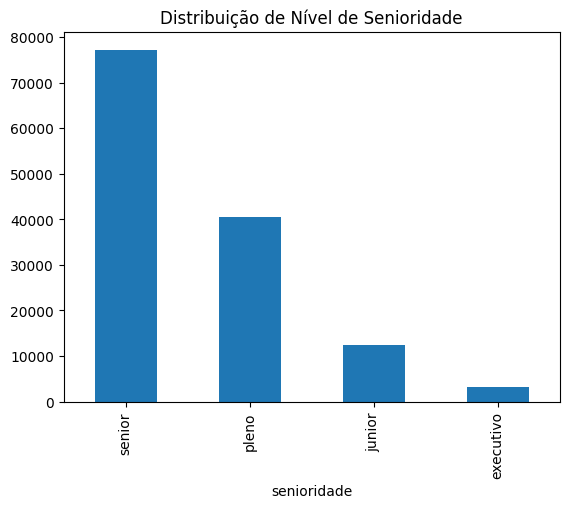

In [ ]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Nível de Senioridade')

In [ ]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

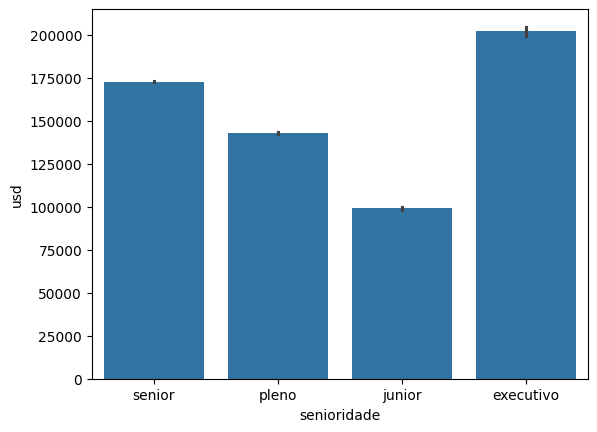

In [ ]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [ ]:
import matplotlib.pyplot as plt

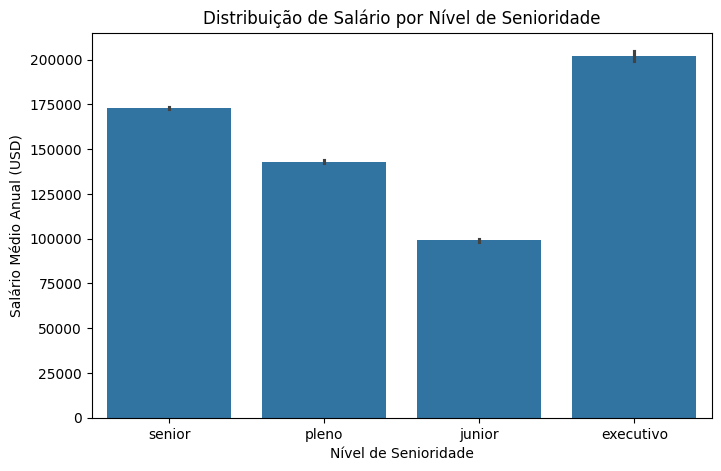

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Distribuição de Salário por Nível de Senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

In [ ]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
executivo,202027.667813
senior,172850.838301
pleno,143044.845979
junior,99034.963267


In [ ]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

In [ ]:
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

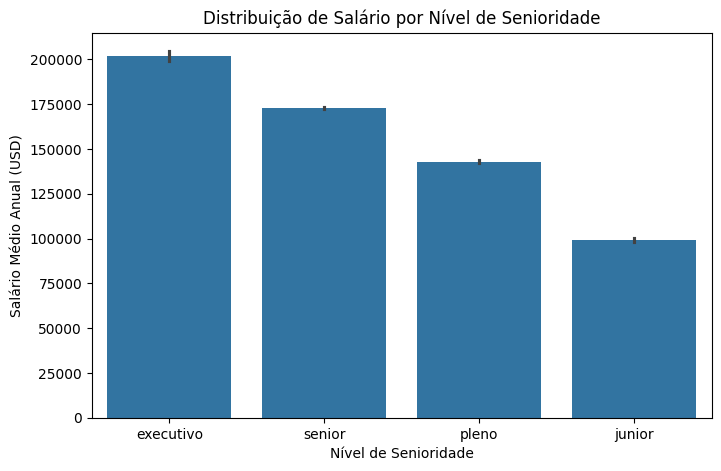

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Distribuição de Salário por Nível de Senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

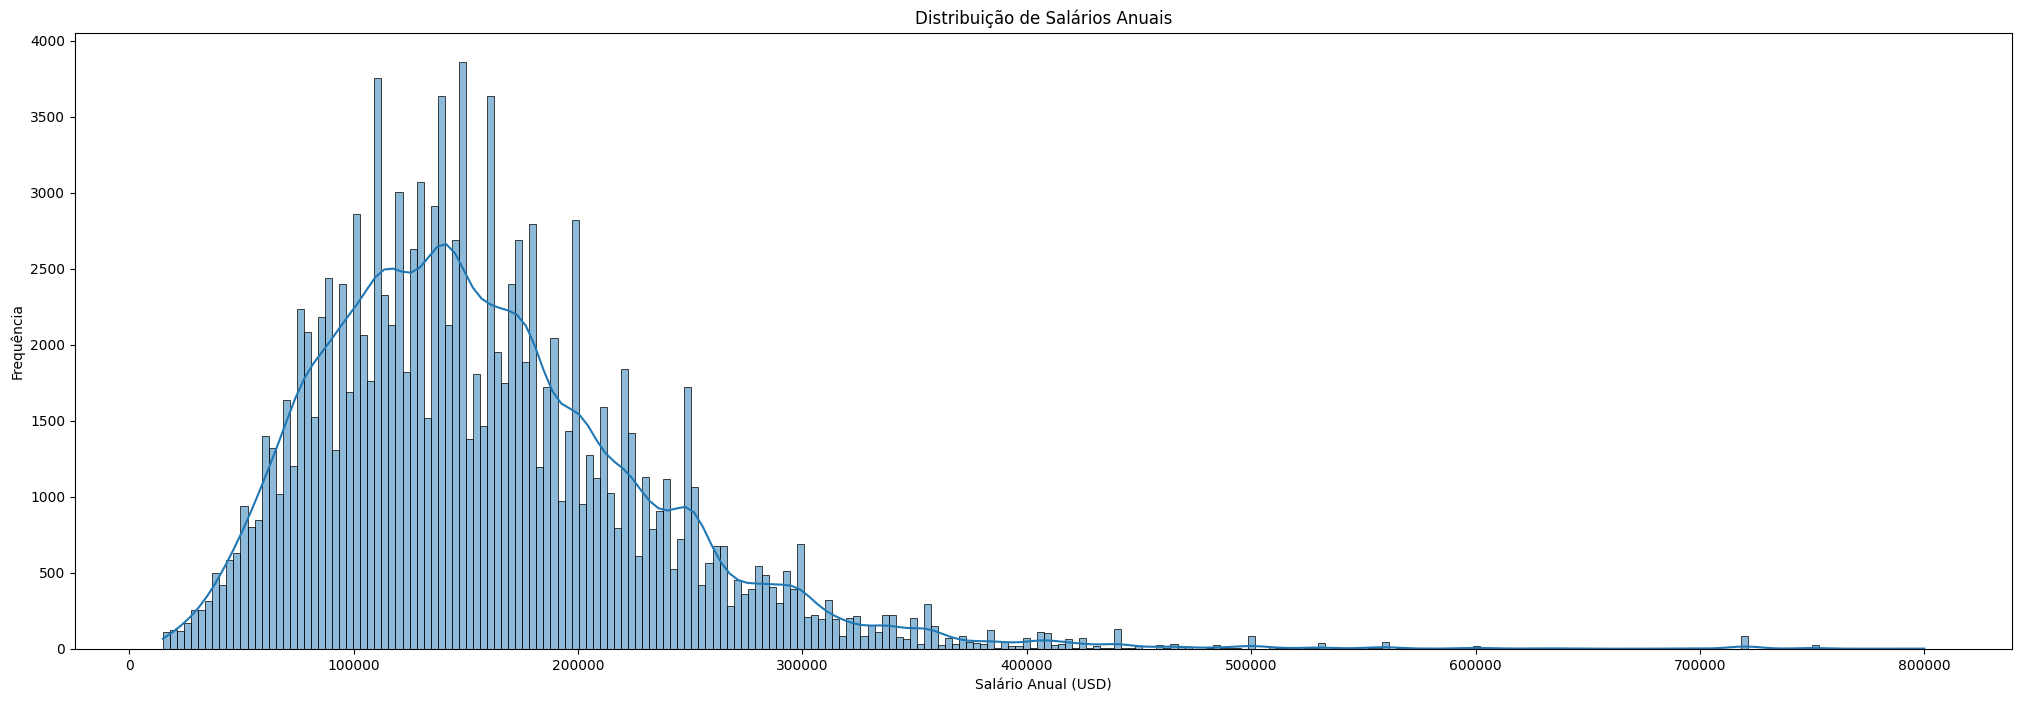

In [ ]:
plt.figure(figsize=(25, 8))
sns.histplot(data=df_limpo['usd'], bins = 250, kde=True)
plt.title('Distribuição de Salários Anuais')
plt.xlabel('Salário Anual (USD)')
plt.ylabel('Frequência')
plt.show()

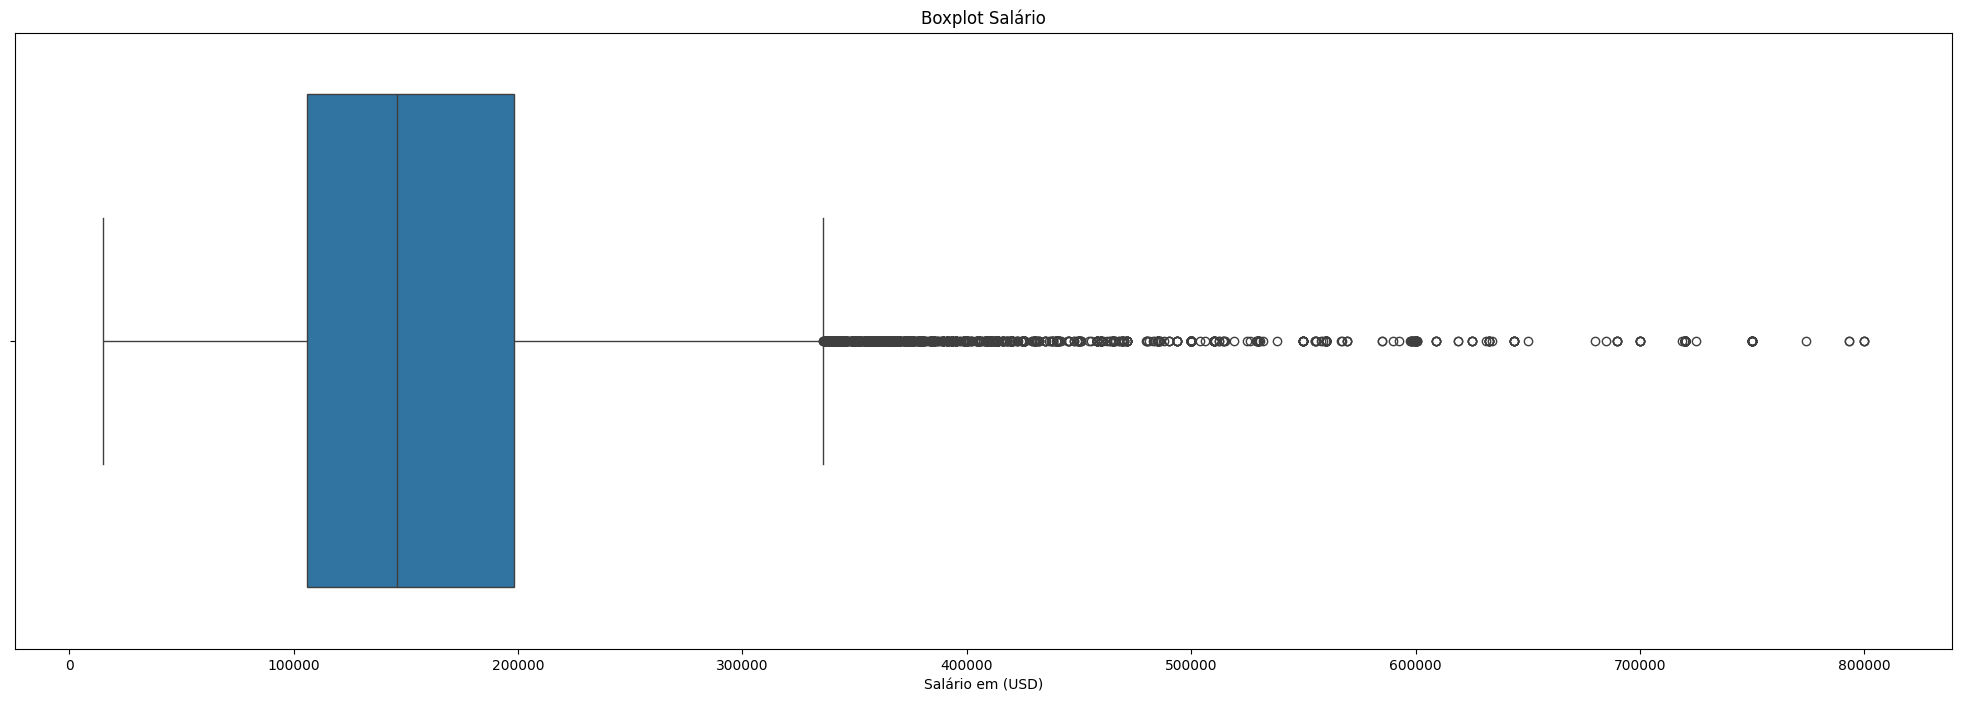

In [ ]:
plt.figure(figsize=(25, 8))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot Salário')
plt.xlabel('Salário em (USD)')
plt.show()

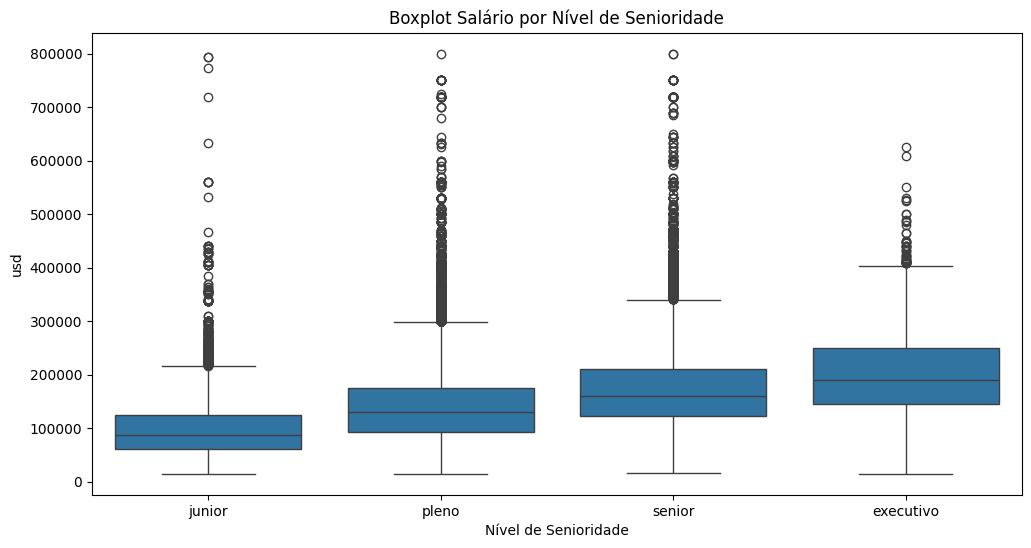

In [ ]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']
plt.figure(figsize=(12, 6))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Boxplot Salário por Nível de Senioridade')
plt.xlabel('Nível de Senioridade')
plt.show()

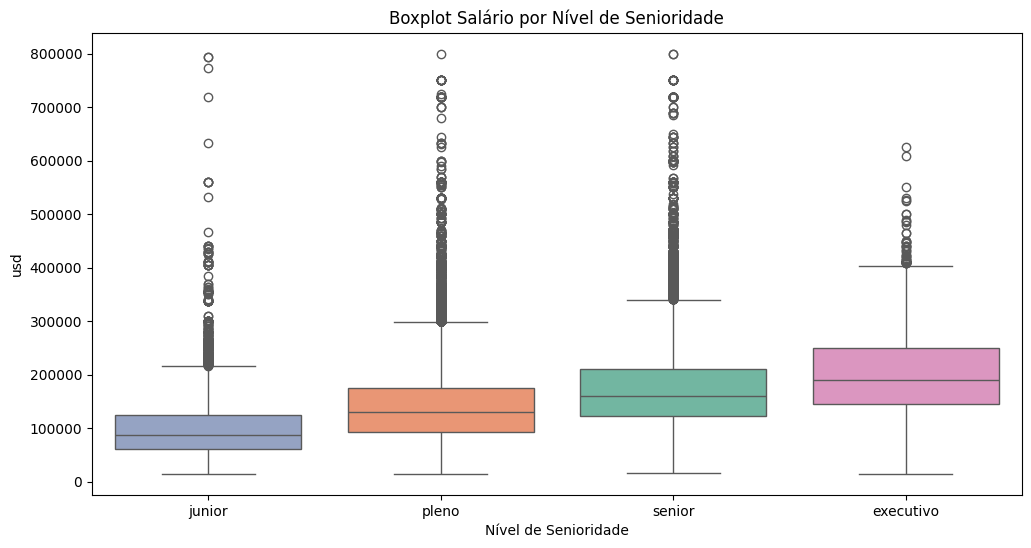

In [ ]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']
plt.figure(figsize=(12, 6))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot Salário por Nível de Senioridade')
plt.xlabel('Nível de Senioridade')
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
media_salario_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index()

fig = px.bar(media_salario_senioridade,
             x='senioridade',
             y='usd',
             title='Média Salarial por Nível de Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'},
             color='senioridade') # Adiciona cor por senioridade

fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()

remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos Tipo de Trabalho')

fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()

remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos Tipo de Trabalho',
             hole=0.5)

fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()

remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos Tipo de Trabalho',
             hole=0.5)

fig.update_traces(textinfo='percent+label')

fig.show()

In [118]:
# ================================================
# Salário médio por país no globo (Plotly) — nome PT-BR + rotação suave
# ================================================
from typing import Optional
import re
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def _nome_pais_pt(alpha2: str, *, fallback_en: str = None) -> str:
    """
    Retorna o nome do país em PT-BR a partir do ISO-2.
    Tenta: babel -> dicionário PT parcial -> pycountry -> fallback_en -> ISO-2.
    """
    # 1) babel (melhor fonte para nomes localizados)
    try:
        from babel import Locale
        nome = Locale('pt').territories.get(alpha2.upper())
        if nome:
            return nome
    except Exception:
        pass

    # 2) dicionário PT parcial (cobre os mais comuns)
    dict_pt = {
        "US": "Estados Unidos", "BR": "Brasil", "GB": "Reino Unido", "DE": "Alemanha", "FR": "França",
        "ES": "Espanha", "PT": "Portugal", "CA": "Canadá", "AU": "Austrália", "IN": "Índia",
        "NL": "Países Baixos", "IT": "Itália", "PL": "Polônia", "AR": "Argentina", "MX": "México",
        "JP": "Japão", "CN": "China", "KR": "Coreia do Sul", "RU": "Rússia", "TR": "Turquia",
        "IE": "Irlanda", "SE": "Suécia", "NO": "Noruega", "DK": "Dinamarca", "FI": "Finlândia",
        "CH": "Suíça", "BE": "Bélgica", "AT": "Áustria", "IL": "Israel", "AE": "Emirados Árabes Unidos",
        "SG": "Singapura", "ZA": "África do Sul", "NZ": "Nova Zelândia", "CL": "Chile", "CO": "Colômbia",
        "PE": "Peru", "UY": "Uruguai", "BO": "Bolívia", "EC": "Equador", "VE": "Venezuela",
        "UA": "Ucrânia", "RO": "Romênia", "CZ": "Tchéquia", "HU": "Hungria", "GR": "Grécia",
        "SK": "Eslováquia", "SI": "Eslovênia", "HR": "Croácia", "EE": "Estônia", "LT": "Lituânia",
        "LV": "Letônia", "BG": "Bulgária", "RS": "Sérvia", "BA": "Bósnia e Herzegovina", "MK": "Macedônia do Norte",
        "PH": "Filipinas", "MY": "Malásia", "ID": "Indonésia", "TH": "Tailândia", "VN": "Vietnã",
    }
    if alpha2.upper() in dict_pt:
        return dict_pt[alpha2.upper()]

    # 3) pycountry (nome em EN)
    try:
        import pycountry
        c = pycountry.countries.get(alpha_2=alpha2.upper())
        if c and getattr(c, "name", None):
            return c.name
    except Exception:
        pass

    # 4) fallback do próprio dado (se passar)
    if fallback_en:
        return fallback_en

    # 5) último recurso
    return alpha2.upper()


def plot_salario_medio_por_pais_globo(
    cargo_query: str,
    *,
    df: Optional[pd.DataFrame] = None,
    col_cargo: str = "cargo",
    col_pais: str = "residencia",
    col_valor: str = "usd",
    min_registros_pais: int = 3,   # evita ruído em países com poucos registros
    titulo: Optional[str] = None,
    rotacao_automatica: bool = True,
    velocidade_rotacao_ms: int = 50  # menor = mais rápido
) -> go.Figure:
    """
    Gera um globo (projeção ortográfica) com o salário médio por país (USD) para um cargo.
    - Busca parcial no nome do cargo (case-insensitive).
    - Usa df_limpo, se existir; senão, baixa CSV.
    - Hover com nome do país em PT-BR (mantém ISO-2 no detalhe).
    - Mantém botões de vistas + adiciona rotação suave opcional.
    """
    # 1) Obter o DataFrame
    if df is None:
        if "df_limpo" in globals():
            base = globals()["df_limpo"].copy()
        else:
            url = "https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv"
            base = pd.read_csv(url)
            renomear = {
                "work_year": "ano",
                "experience_level": "senioridade",
                "employment_type": "contrato",
                "job_title": "cargo",
                "salary": "salario",
                "salary_currency": "moeda",
                "salary_in_usd": "usd",
                "employee_residence": "residencia",
                "remote_ratio": "remoto",
                "company_location": "empresa",
                "company_size": "tamanho_empresa",
            }
            for k, v in renomear.items():
                if k in base.columns:
                    base.rename(columns={k: v}, inplace=True)
            base = base.dropna(subset=[col_cargo, col_pais, col_valor]).copy()
    else:
        base = df.copy()

    # Validações
    faltantes = {col_cargo, col_pais, col_valor} - set(base.columns)
    if faltantes:
        raise ValueError(f"Colunas ausentes no DataFrame: {sorted(faltantes)}")

    # 2) Filtrar pelo cargo
    padrao = re.compile(re.escape(cargo_query), flags=re.IGNORECASE)
    df_cargo = base[base[col_cargo].astype(str).str.contains(padrao)]
    if df_cargo.empty:
        raise ValueError(f"Nenhum dado encontrado para o cargo contendo: '{cargo_query}'.")

    # 3) Agregar salário médio por país + contagem
    agg = (df_cargo
           .groupby(col_pais, as_index=False)
           .agg(
               salario_medio_usd=(col_valor, "mean"),
               n=("usd", "size")
           ))

    # filtro por mínimo de registros
    agg = agg[agg["n"] >= min_registros_pais].copy()
    if agg.empty:
        raise ValueError(
            f"Após aplicar min_registros_pais={min_registros_pais}, não há países suficientes para plotar."
        )

    # 4) ISO-2 -> ISO-3 e nome PT-BR do país
    iso2_to_iso3 = {}
    try:
        import pycountry
        for code in agg[col_pais].unique():
            try:
                c = pycountry.countries.get(alpha_2=code)
                iso2_to_iso3[code] = c.alpha_3 if c else None
            except Exception:
                iso2_to_iso3[code] = None
    except Exception:
        iso2_to_iso3 = {
            "US": "USA", "BR": "BRA", "GB": "GBR", "DE": "DEU", "FR": "FRA",
            "ES": "ESP", "PT": "PRT", "CA": "CAN", "AU": "AUS", "IN": "IND",
            "NL": "NLD", "IT": "ITA", "PL": "POL", "AR": "ARG", "MX": "MEX",
            "JP": "JPN", "CN": "CHN", "KR": "KOR", "RU": "RUS", "TR": "TUR",
            "IE": "IRL", "SE": "SWE", "NO": "NOR", "DK": "DNK", "FI": "FIN",
            "CH": "CHE", "BE": "BEL", "AT": "AUT", "IL": "ISR", "AE": "ARE",
            "SG": "SGP", "ZA": "ZAF", "NZ": "NZL", "CL": "CHL", "CO": "COL",
            "PE": "PER", "UY": "URY", "BO": "BOL", "EC": "ECU", "VE": "VEN",
            "UA": "UKR", "RO": "ROU", "CZ": "CZE", "HU": "HUN", "GR": "GRC",
            "SK": "SVK", "SI": "SVN", "HR": "HRV", "EE": "EST", "LT": "LTU",
            "LV": "LVA", "BG": "BGR", "RS": "SRB", "BA": "BIH", "MK": "MKD",
            "PH": "PHL", "MY": "MYS", "ID": "IDN", "TH": "THA", "VN": "VNM",
        }

    agg["iso3"] = agg[col_pais].map(iso2_to_iso3)
    agg = agg.dropna(subset=["iso3"]).copy()

    # Nome do país em PT-BR
    agg["nome_pais_pt"] = agg[col_pais].apply(_nome_pais_pt)

    # 5) Formatação
    agg["salario_medio_usd_fmt"] = agg["salario_medio_usd"].round(0).map(lambda v: f"US$ {int(v):,}".replace(",", "."))

    # 6) Construção do globo (choropleth + projeção ortográfica)
    if not titulo:
        titulo = f"Salário médio anual (USD) por país — Cargo contém: {cargo_query}"

    fig = px.choropleth(
        agg,
        locations="iso3",
        color="salario_medio_usd",
        hover_name="nome_pais_pt",  # nome completo PT-BR
        hover_data={
            "salario_medio_usd": False,
            "salario_medio_usd_fmt": True,
            "n": True,
            col_pais: True,   # mantém ISO-2 no hover
            "iso3": False,
        },
        color_continuous_scale="Viridis",
        labels={"salario_medio_usd": "Salário médio (USD)"},
        title=titulo,
    )

    # Aparência
    fig.update_geos(
        projection_type="orthographic",
        showocean=True, oceancolor="rgba(230,240,255,1)",
        showland=True, landcolor="rgba(240,240,240,1)",
        showcountries=True, countrycolor="rgba(120,120,120,0.5)",
        showframe=False, showcoastlines=True, coastlinecolor="rgba(100,100,100,0.4)"
    )

    fig.update_layout(
        title=dict(x=0.02, y=0.98, xanchor="left", yanchor="top", font=dict(size=18)),
        margin=dict(l=0, r=0, t=60, b=0),
        coloraxis_colorbar=dict(title="USD", ticks="outside", tickprefix="US$ "),
        paper_bgcolor="white",
        plot_bgcolor="white",
        hoverlabel=dict(bgcolor="white", font_size=12, namelength=-1),
    )

    # Tooltip detalhado (nome PT + ISO-2)
    # customdata: [salario_medio_usd_fmt, n, col_pais]
    fig.update_traces(
        hovertemplate="<b>País</b>: %{hovertext} (%{customdata[2]})<br>"
                      "Salário médio: %{customdata[0]}<br>"
                      "Registros: %{customdata[1]}<extra></extra>"
    )

    # 7) Rotação suave opcional (sem perder os botões de vista)
    menus = []

    # a) Botões de rotação (animada)
    if rotacao_automatica:
        frames = []
        for lon in range(-180, 181, 2):
            frames.append(go.Frame(layout={"geo": {"projection": {"rotation": {"lon": lon, "lat": 15}}}}))
        fig.frames = frames

        menus.append({
            "type": "buttons",
            "showactive": False,
            "buttons": [
                {
                    "label": "Girar",
                    "method": "animate",
                    "args": [None, {"frame": {"duration": velocidade_rotacao_ms, "redraw": True},
                                    "fromcurrent": True, "loop": True}]
                },
                {
                    "label": "Parar",
                    "method": "animate",
                    "args": [[None], {"mode": "immediate",
                                      "frame": {"duration": 0, "redraw": False},
                                      "transition": {"duration": 0}}]
                }
            ],
            "x": 0.02, "y": 0.01, "xanchor": "left", "yanchor": "bottom"
        })

    # b) Botões de vistas (mantidos)
    rotacoes = [{"lon": lon, "lat": 15} for lon in [-100, -50, 0, 50, 100, 150, 180]]
    botoes_vistas = []
    for i, rot in enumerate(rotacoes, start=1):
        botoes_vistas.append(dict(
            label=f"Vista {i}",
            method="relayout",
            args=[{"geo.projection.rotation": rot}]
        ))

    menus.append(dict(
        type="buttons",
        direction="right",
        x=0.02, y=0.08,  # um pouco acima dos botões de rotação
        xanchor="left", yanchor="bottom",
        showactive=True,
        buttons=botoes_vistas
    ))

    fig.update_layout(updatemenus=menus)

    return fig

# -----------------------------------------
# Exemplo de uso:
fig = plot_salario_medio_por_pais_globo("Data Scientist", rotacao_automatica=True, velocidade_rotacao_ms=50)
fig.show()